In [4]:
cd ..

/Users/jenniferpaige/getit/Solar


In [8]:
from src.Prep import *
from src.Time_Series_Helper_Funcs import *
import matplotlib.pyplot as plt
from src.Regression_Helper_Funcs import *
from src.Plot import * 
import warnings
warnings.filterwarnings('ignore')

In [9]:
cd PREV/

/Users/jenniferpaige/getit/Solar/PREV


In [10]:
%load_ext autoreload

In [11]:
%reload_ext autoreload

In [12]:
%autoreload

In [13]:
df = prep()

1 of 11 |    Reading in first dataset. 
             Using 4/60 features/columns: 'Installation Date', 'System Size', 'Total Installed Price' , 'Customer Segment' 
             Changing -9999 values to null
2 of 11 |    Reading in second dataset. 
             Using 4/60 features/columns: 'Installation Date', 'System Size', 'Total Installed Price' , 'Customer Segment' 
             Changing -9999 values to null
3 of 11 |    Concatenating datasets together
4 of 11 |    Refining to only RES Customer Segment
5 of 11 |    Cleaning up column names
6 of 11 |    Sorting values by installation_date
7 of 11 |    Assigning installation_date as index
8 of 11 |    Replacing all null values with median values from same year
9 of 11 |    Adusting prices for inflation
10 of 11|    Creating target variable: cost_per_watt
11 of 11|    Removing > 1600 outliers above $25 per watt
Prep complete 
 ------------------------------------------------------------


## SHORTEND TIMELINE 

In [15]:
y = time_frame(df)

In [20]:
y = y.dropna()

In [16]:
ols_model, ols_trend = lag_ols_model(y)[0], lag_ols_model(y)[1]
linear_model, linear_trend = linear_ols_model(y)[0], linear_ols_model(y)[1]
rf_model, rf_trend = randomforest_model(y)[0], randomforest_model(y)[1]
score_table(y, ols_model, linear_model, rf_model)

AttributeError: 'numpy.ndarray' object has no attribute 'shift'

In [40]:
ols_model, ols_trend = lag_ols_model(y)[0], lag_ols_model(y)[1]
linear_model, linear_trend = linear_ols_model(y)[0], linear_ols_model(y)[1]
rf_model, rf_trend = randomforest_model(y)[0], randomforest_model(y)[1]
score_table(y, ols_model, linear_model, rf_model)

,MAE,MSE,RMSE
Models,,,
OLS,0.189762,0.120843,0.347625
LINEAR,0.555970,0.555970,0.745634
RF,0.074146,0.021341,0.146086


In [ ]:
compute_autocorrelation(s_lagg)

In [180]:
simple_move(y)

cost_1weekago [
 MAE: 0.05 
 MSE: 0.0 
 RMSE: 0.07 ]
cost_3weeksago [
 MAE: 0.07 
 MSE: 0.01 
 RMSE: 0.09 ]
None None


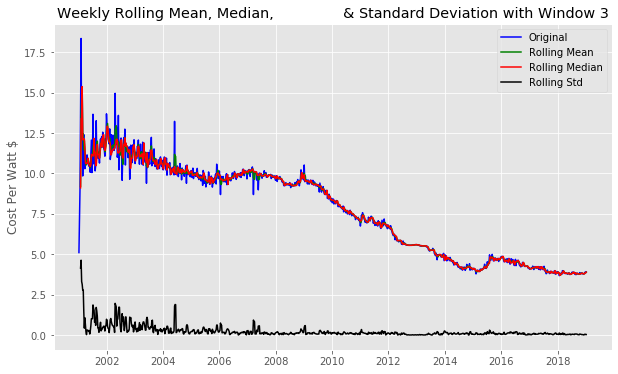

Results of Dickey-Fuller Test:
Test Statistic            0.121576
p-value                   0.967504
#Lags Used               22.000000
#Observations Used      916.000000
Critical Value (1%)      -3.437509
Critical Value (5%)      -2.864700
Critical Value (10%)     -2.568453
dtype: float64


In [21]:
rolling_plot(y)
dfuller_test(y)

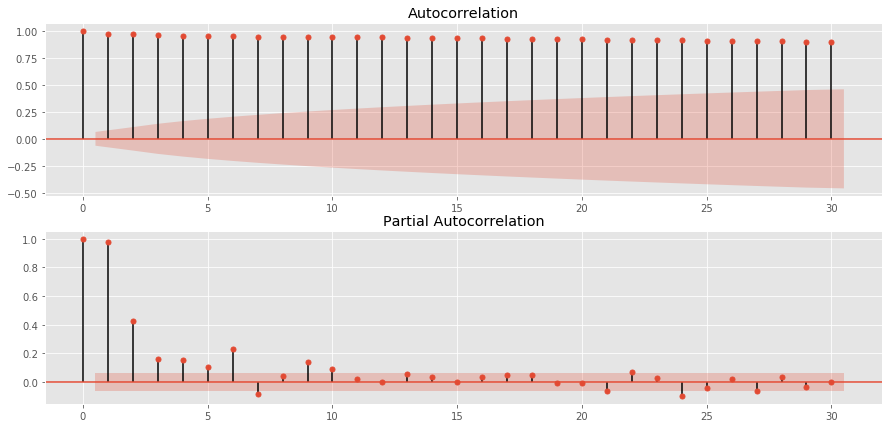

In [22]:
autocor_plots(y)

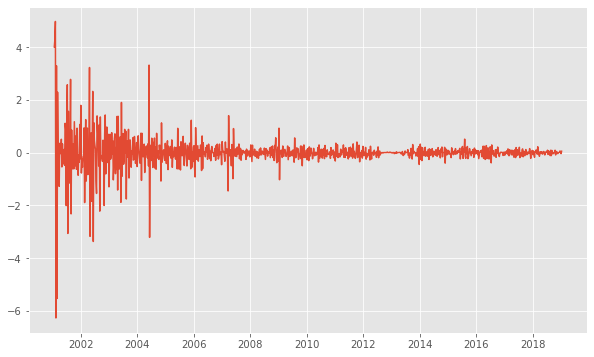

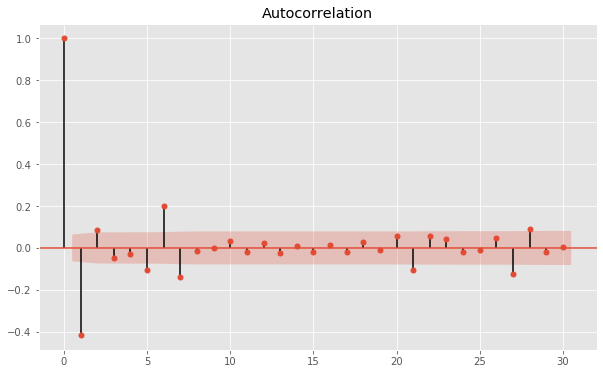

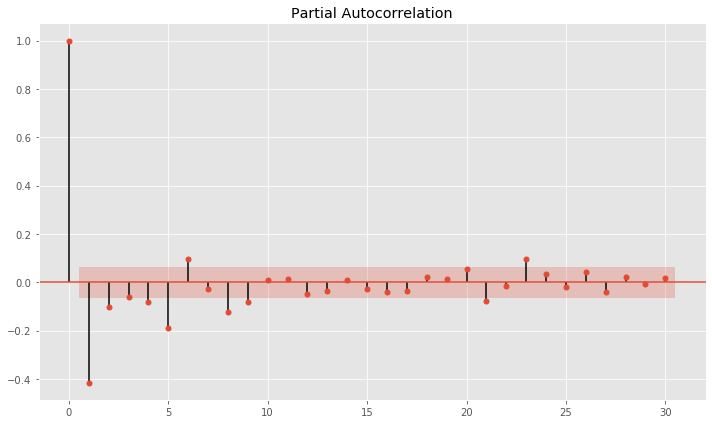

In [27]:
diff = get_differences(y)
diff = diff.dropna()

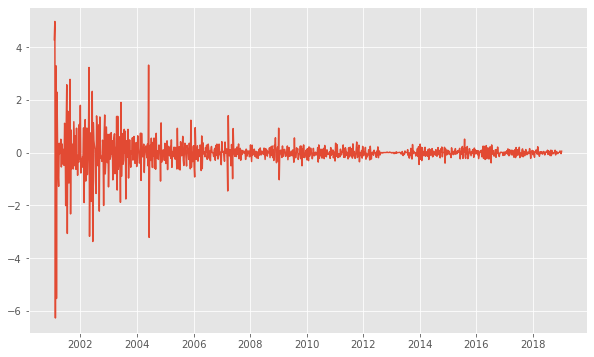

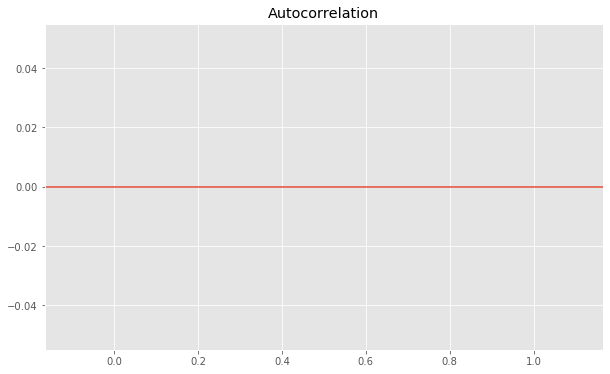

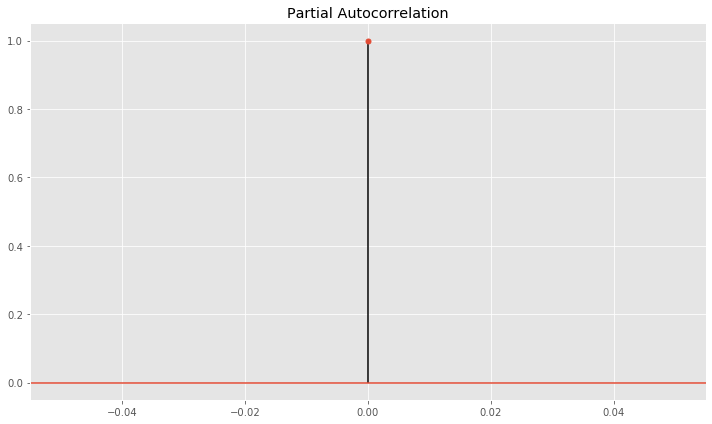

In [21]:
#shortened timeline 
diff = get_differences(y['cost_per_watt'])

In [23]:
diff = diff.dropna()

In [28]:
auto_arima(diff)

ARIMA(maxiter=50, method='lbfgs', order=(3, 0, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [25]:
auto_arima(diff, seasonal=False, stepwise=False, information_criterion='aic')

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 3), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [27]:
auto_arima(diff, seasonal=False, stepwise=False, information_criterion='oob')

ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [28]:
auto_arima(diff, stepwise=False, information_criterion='aic')

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 3), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 1),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [29]:
auto_arima(diff, information_criterion='oob')

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [32]:
auto_arima(diff, seasonal=False, stepwise=False, with_intercept=False ,return_valid_fits=True)

[ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 3), out_of_sample_size=0,
       scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
       start_params=None, suppress_warnings=False, trend=None,
       with_intercept=False),
 ARIMA(maxiter=50, method='lbfgs', order=(5, 0, 0), out_of_sample_size=0,
       scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
       start_params=None, suppress_warnings=False, trend=None,
       with_intercept=False),
 ARIMA(maxiter=50, method='lbfgs', order=(4, 0, 1), out_of_sample_size=0,
       scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
       start_params=None, suppress_warnings=False, trend=None,
       with_intercept=False),
 ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 5), out_of_sample_size=0,
       scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
       start_params=None, suppress_warnings=False, trend=None,
       with_intercept=False),
 ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 2), 

In [43]:
auto_arima(diff, stepwise=False ,trace=True, max_p=8, max_P=8, max_order=11)

Fit ARIMA: (0, 0, 0)x(0, 0, 0, 1) (constant=True); AIC=1756.331, BIC=1766.017, Time=0.093 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 1) (constant=True); AIC=1262.921, BIC=1277.449, Time=0.171 seconds
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 1) (constant=True); AIC=1263.622, BIC=1282.993, Time=0.353 seconds
Fit ARIMA: (0, 0, 3)x(0, 0, 0, 1) (constant=True); AIC=1265.405, BIC=1289.618, Time=0.346 seconds
Fit ARIMA: (0, 0, 4)x(0, 0, 0, 1) (constant=True); AIC=1265.511, BIC=1294.567, Time=0.646 seconds
Fit ARIMA: (0, 0, 5)x(0, 0, 0, 1) (constant=True); AIC=1568.655, BIC=1602.554, Time=0.894 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 1) (constant=True); AIC=1494.751, BIC=1509.279, Time=0.067 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 1) (constant=True); AIC=1263.680, BIC=1283.051, Time=0.220 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 1) (constant=True); AIC=1265.820, BIC=1290.034, Time=0.335 seconds
Fit ARIMA: (1, 0, 3)x(0, 0, 0, 1) (constant=True); AIC=1266.069, BIC=1295.125, Time=0.600 seconds
Fit ARIMA: (1, 0, 4)

ARIMA(maxiter=50, method='lbfgs', order=(6, 0, 4), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 1),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [45]:
test_for_stationarity(diff)

ADF p-value: 0.00
Achieved stationarity! Reject ADF H0.


In [46]:
#ORIGINAL REGRESSION
ols_model, ols_trend = lag_ols_model(y)[0], lag_ols_model(y)[1]
linear_model, linear_trend = linear_ols_model(y)[0], linear_ols_model(y)[1]
rf_model, rf_trend = randomforest_model(y)[0], randomforest_model(y)[1]
print('Regression Models on original data')
score_table(y, ols_model, linear_model, rf_model)


Regression Models on original data


,MAE,MSE,RMSE
Models,,,
OLS,0.189762,0.120843,0.347625
LINEAR,0.555970,0.555970,0.745634
RF,0.072495,0.019823,0.140796


In [47]:
# RUN STATIONARY DATA THROUGH ORIGINAL REGRESSION
tsols_model, tsols_trend = stat_lag_ols_model(diff)[0], stat_lag_ols_model(diff)[1]
tslinear_model, tslinear_trend = stat_linear_ols_model(diff)[0], stat_linear_ols_model(diff)[1]
tsrf_model, tsrf_trend = stat_randomforest_model(diff)[0], stat_randomforest_model(diff)[1]
print('Regression Models on differenced stationary data')
stat_score_table(diff, tsols_model, tslinear_model, tsrf_model)

Regression Models on differenced stationary data


,MAE,MSE,RMSE
Models,,,
OLS,0.184800,0.115255,0.339493
LINEAR,0.227956,0.227956,0.477447
RF,0.126722,0.061356,0.247701


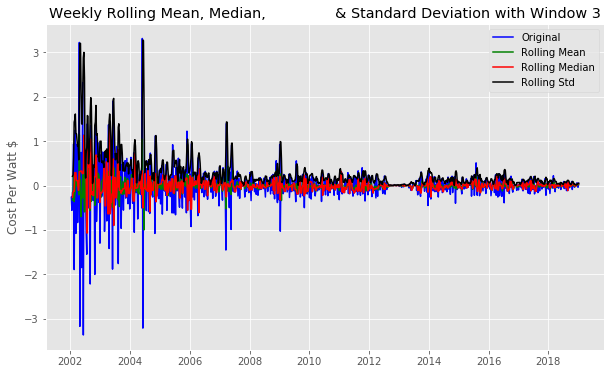

Results of Dickey-Fuller Test:
Test Statistic                -6.775243e+00
p-value                        2.580703e-09
#Lags Used                     2.100000e+01
Number of Observations Used    8.650000e+02
Critical Value (1%)           -3.437932e+00
Critical Value (5%)           -2.864887e+00
Critical Value (10%)          -2.568552e+00
dtype: float64


In [48]:
rolling_plot(diff[1:])
dfuller_test(diff[1:])

<function matplotlib.pyplot.show(*args, **kw)>

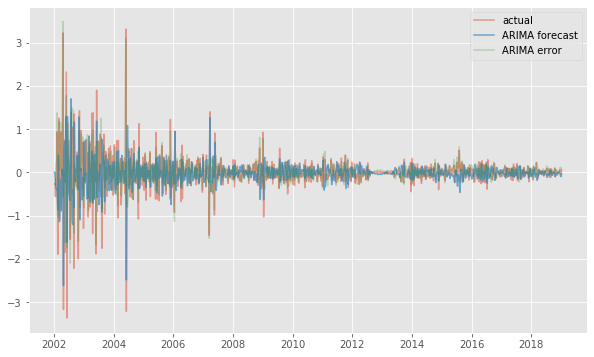

In [49]:
arima_forecast = pd.DataFrame(ARIMA(diff, order=(4,1,1), missing='drop', dates=diff.index.date, freq='W',).fit().predict())
arima_diff = diff.copy()
arima_diff['arima_preds'] = arima_forecast
arima_diff['error'] = arima_diff['cost_per_watt'] - arima_diff['arima_preds']
plt.plot(diff, alpha=0.5, label= 'actual')
plt.plot(arima_forecast, label='ARIMA forecast', alpha=0.7)
plt.plot(arima_diff['error'], label='ARIMA error', alpha=0.2, color='green')
plt.legend(loc='best')
plt.show

In [ ]:
w_diff = weekly_differences.dropna()

s_lagg_cost = create_lag(weekly_differences)

compute_autocorrelation(s_lagg_cost)

plot_ac_scat(w_diff)

s_linear_model, s_linear_trend = linear_model_trend(syw)[0], linear_model_trend(syw)[1]

s_linear_model, s_linear_trend = linear_model_trend(syw)[0], linear_model_trend(syw)[1]

print('r squared for linear model on price', s_linear_model.rsquared)
print('mse total for linear model on price', s_linear_model.mse_total)
print('r squared for linear model on price', s_linear_model.summary)      

s_linear_model.summary()

diff_linear_model.summary()

s_linear_model, s_linear_trend = linear_model_trend(syw)[0], linear_model_trend(syw)[1]

diff_linear_model, diff_linear_trend = linear_model_trend(w_diff)[0], linear_model_trend(w_diff)[1]

Even though test statistic and critical value are not near equal, we only care about pvalue which determines if we can reject the null hypothesis of the ADF test. 

In [ ]:
wd = np.array(weekly_differences)
sywa = np.array(syw)

In [ ]:
auto_arima(wd[1:]).order

In [ ]:
random_forest_model(syw)

In [ ]:
from src.Regression_Helper_Funcs import *
from src.Time_Series_Helper_Funcs import * 

In [ ]:
%autoreload

In [182]:
#ORIGINAL REGRESSION
ols_model, ols_trend = lag_ols_model(y)[0], lag_ols_model(y)[1]
linear_model, linear_trend = linear_ols_model(y)[0], linear_ols_model(y)[1]
rf_model, rf_trend = randomforest_model(y)[0], randomforest_model(y)[1]
#REGRESSIONS ON DIFFERENCED DATA
tsols_model, tsols_trend = stat_lag_ols_model(diff)[0], stat_lag_ols_model(diff)[1]
tslinear_model, tslinear_trend = stat_linear_ols_model(diff)[0], stat_linear_ols_model(diff)[1]
tsrf_model, tsrf_trend = stat_randomforest_model(diff)[0], stat_randomforest_model(diff)[1]
diff_reg_scores = (stat_score_table(diff, tsols_model, tslinear_model, tsrf_model).T).rename(columns={'OLS':'OLS_diff', 'LINEAR':'LINEAR_diff','RF':'RF_diff'})
diff_reg_scores = diff_reg_scores.T
reg_scores = pd.DataFrame(score_table(y, ols_model, linear_model, rf_model))
scores_for_all = pd.DataFrame(pd.concat([reg_scores, diff_reg_scores]))
scores_for_all.sort_values(by='MSE')

,MAE,MSE,RMSE
Models,,,
RF,0.072560,0.020035,0.141543
RF_diff,0.124103,0.057023,0.238796
OLS_diff,0.184800,0.115255,0.339493
OLS,0.189762,0.120843,0.347625
LINEAR_diff,0.227956,0.227956,0.477447
LINEAR,0.555970,0.555970,0.745634


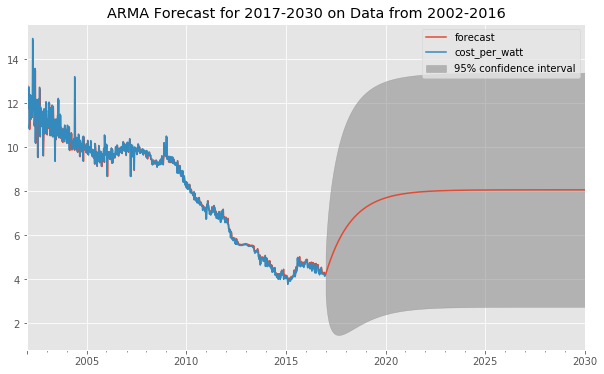

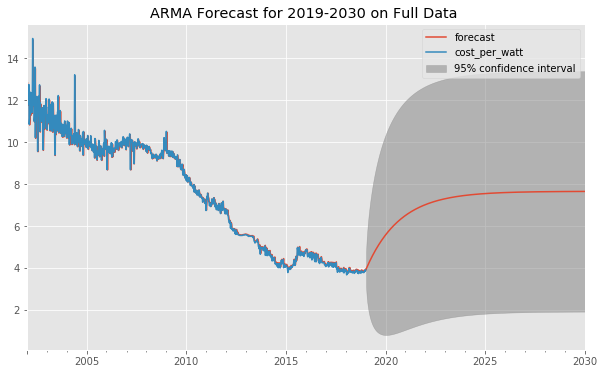

ARMA Condfidence Intervals                             0         1
const                5.320956  9.994639
ar.L1.cost_per_watt  0.978574  0.998817


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          cost_per_watt   No. Observations:                  888
Model:                     ARMA(1, 0)   Log Likelihood                -530.658
Method:                       css-mle   S.D. of innovations              0.439
Date:                Fri, 20 Mar 2020   AIC                           1067.315
Time:                        17:20:13   BIC                           1081.682
Sample:                    01-06-2002   HQIC                          1072.807
                         - 01-06-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.6578      1.192      6.423      0.000       5.321       9.995
ar.L1.cost_per_watt     0.9887      0.005    191.454      0.000       0.979       0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0114           +0.0000j            1.0114            0.0000
-----------------------------------------------------------------------------
"""

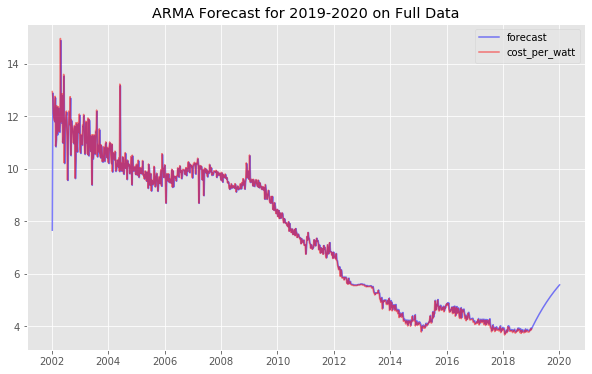

In [50]:
#ARMA ON FULL DATA

first_14 = y.loc[y.index.year <2017]
last_few = y.loc[y.index.year >2016]

mod = ARMA(first_14, order=(1,0), freq='W', )
res = mod.fit()
res.plot_predict(end='2030')
plt.title('ARMA Forecast for 2017-2030 on Data from 2002-2016')
plt.show()

mod = ARMA(y, order=(1,0), freq='W', )
res = mod.fit()
res.plot_predict(end='2030')
plt.title('ARMA Forecast for 2019-2030 on Full Data ')
plt.show()

plt.plot(res.predict(end='2020'), alpha=0.5, color='blue', label='forecast')
plt.plot(y, color='red', alpha=0.5, label='cost_per_watt')
plt.title('ARMA Forecast for 2019-2020 on Full Data')
plt.legend()

print('ARMA Condfidence Intervals', res.conf_int())
res.summary()

In [ ]:
ols_model, ols_trend = lag_ols_model(y)[0], lag_ols_model(y)[1]
linear_model, linear_trend = linear_ols_model(y)[0], linear_ols_model(y)[1]
rf_model, rf_trend = randomforest_model(y)[0], randomforest_model(y)[1]
score_table(y, ols_model, linear_model, rf_model)

In [51]:
print('covariance matrix for ols model \n', ols_model.cov_params())
print('---------------------------')
print('covariance matrix for linear model \n', linear_model.cov_params())
print('---------------------------')
print('covariance matrix for robust linear model \n', rf_model.feature_importances_)

covariance matrix for ols model 
            Intercept      Lag1      Lag2      Lag3
Intercept   0.001208 -0.000045 -0.000048 -0.000049
Lag1       -0.000045  0.000937 -0.000472 -0.000458
Lag2       -0.000048 -0.000472  0.000950 -0.000472
Lag3       -0.000049 -0.000458 -0.000472  0.000935
---------------------------
covariance matrix for linear model 
           const            x1
const  0.002094 -3.534835e-06
x1    -0.000004  7.952384e-09
---------------------------
covariance matrix for robust linear model 
 [0. 1.]


In [ ]:
#ARMA PLOT
#Plot3
ts_diff = df[1:] #remove the NaN
first_14 = ts_diff.loc[ts_diff.index.year <2017]
last_few = ts_diff.loc[ts_diff.index.year >2016]
mod3 = ARMA(ts_diff, order=(1,0), freq='W', )
res3 = mod3.fit()
plt.plot(res3.predict(end='2020'), alpha=0.5, color='blue', label='forecast')
plt.plot(ts_diff, color='red', alpha=0.5, label='cost_per_watt')
plt.title('ARMA Forecast through 2020 on Full Data')
plt.legend()
plt.show()
print('Confidence Intervals for ARMA Forecast through 2020 on Full Data', res3.conf_int())
print(res3.summary())

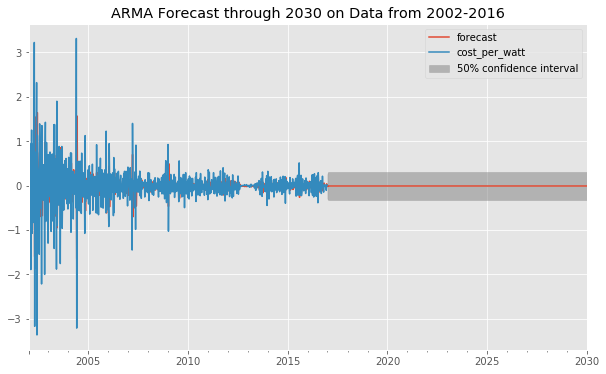

Confidence Intervals for ARMA Forecast through 2030 on Data from 2002-2016                             0         1
const               -0.030252  0.008003
ar.L1.cost_per_watt -0.553421 -0.431490
                              ARMA Model Results                              
Dep. Variable:          cost_per_watt   No. Observations:                  781
Model:                     ARMA(1, 0)   Log Likelihood                -406.005
Method:                       css-mle   S.D. of innovations              0.407
Date:                Fri, 20 Mar 2020   AIC                            818.011
Time:                        19:12:32   BIC                            831.993
Sample:                    01-13-2002   HQIC                           823.388
                         - 12-25-2016                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------

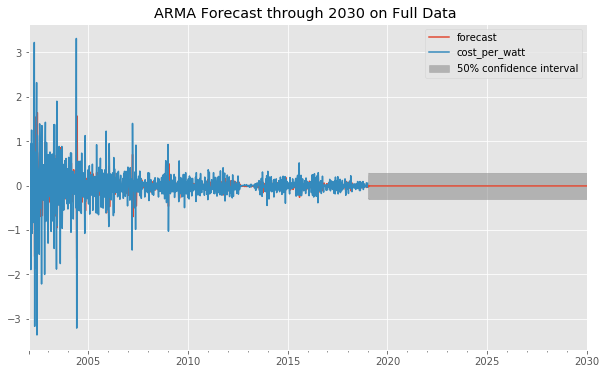

Confidence Intervals for ARMA Forecast through 2030 on Full Data                             0         1
const               -0.027008  0.006780
ar.L1.cost_per_watt -0.549122 -0.434644
                              ARMA Model Results                              
Dep. Variable:          cost_per_watt   No. Observations:                  887
Model:                     ARMA(1, 0)   Log Likelihood                -407.101
Method:                       css-mle   S.D. of innovations              0.383
Date:                Fri, 20 Mar 2020   AIC                            820.201
Time:                        19:12:32   BIC                            834.565
Sample:                    01-13-2002   HQIC                           825.692
                         - 01-06-2019                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const  

In [181]:
arma_res1, arma_res2 = ARMA_plots(diff)

In [ ]:

def ARMA_model(df, fcst_start, fcst_end):
    '''
    forecasts beginning from fcst_start through end of df
    fcst_start - date time string index from df entered in date time string format "YYYY-MM-DD"
    '''
    trunc_df = df[1:fcst]
    if fcst_end != df.index[-1]:
        new_dates = pd.DataFrame(pd.date_range(start=df.index[-1], end=fcst_end, freq='W'))
        new_dates['cost_per_watt'] = 0
        new_dates.set_index(0, drop=True, inplace=True)
        trunc_df = pd.concat([trunc_df, new_dates])
        continue
    else: 
        mod1 = ARMA(trunc_df, order=(1,0), freq='W', )
        res1 = mod1.fit()
        res.plot_predict(end=fcst_end)
        return res1

In [ ]:
def ARMA_model(df, fcst_start, fcst_end):
    '''
    fcst_start - date time string index from df entered in date time string format "YYYY-MM-DD"
    fcst_end - end of df entered in date time string format "YYYY-MM-DD"
    '''
    trunc_df = diff.loc[diff.index.year < begin_year] 
    act_cst = diff[len(trunc_df):]

    
    
    trunc_df = df[1:fcst_start]
    if fcst_end == df.index[-1]:
        mod1 = ARMA(trunc_df, order=(1,0), freq='W', )
        res1 = mod1.fit()
        res.plot_predict(end=fcst_end)
        return res1
    else:   
        new_dates = pd.DataFrame(pd.date_range(start=df.index[-1], end=fcst_end, freq='W'))
        new_dates['cost_per_watt'] = 0
        new_dates.set_index(0, drop=True, inplace=True)
        trunc_df = pd.concat([trunc_df, new_dates])    
        
 
        

In [225]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
# def evaluate_arima_model(X, arima_order):
#     # prepare training dataset
#     train_size = int(len(X) * 0.66)
#     train, test = X[0:train_size], X[train_size:]
#     history = [x for x in train]
#     # make predictions
#     predictions = list()
#     for t in range(len(test)):
#         model = ARIMA(history, order=arima_order)
#         model_fit = model.fit(disp=0)
#         yhat = model_fit.forecast()[0]
#         predictions.append(yhat)
#         history.append(test[t])
#     # calculate out of sample error
#     error = mean_squared_error(test, predictions)
#     return error

# def evaluate_models(dataset, p_values, d_values, q_values):
#     best_score, best_cfg = float("inf"), None
#     for p in p_values:
#         for d in d_values:
#             for q in q_values:
#                 order = (p,d,q)
#                 try:
#                     mse = evaluate_arima_model(dataset, order)
#                     if mse < best_score:
#                         best_score, best_cfg = mse, order
#                     print('ARIMA%s MSE=%.3f' % (order,mse))
#                 except:
#                     continue
#     print('Best ARIMA %s MSE=%.3f' % (best_cfg, best_score))

# p_values = [0, 1, 2, 4, 6, 8, 10]
# d_values = range(0, 3)
# q_values = range(0, 3)
# warnings.filterwarnings("ignore")
# evaluate_models(diff[1:].values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.015
ARIMA(0, 0, 1) MSE=0.018
ARIMA(0, 0, 2) MSE=0.018
ARIMA(0, 1, 0) MSE=0.043
ARIMA(0, 1, 1) MSE=0.015
ARIMA(0, 1, 2) MSE=0.017
ARIMA(0, 2, 0) MSE=0.139
ARIMA(0, 2, 1) MSE=0.043
ARIMA(0, 2, 2) MSE=0.016
ARIMA(1, 0, 0) MSE=0.013
ARIMA(1, 0, 1) MSE=0.018
ARIMA(1, 0, 2) MSE=0.018
ARIMA(1, 1, 0) MSE=0.027
ARIMA(1, 2, 0) MSE=0.067
ARIMA(2, 0, 0) MSE=0.013
ARIMA(2, 0, 1) MSE=0.017
ARIMA(2, 0, 2) MSE=0.017
ARIMA(2, 1, 0) MSE=0.021
ARIMA(2, 2, 0) MSE=0.045
ARIMA(4, 0, 0) MSE=0.013
ARIMA(4, 2, 0) MSE=0.031
ARIMA(6, 0, 1) MSE=0.018


<function matplotlib.pyplot.show(*args, **kw)>

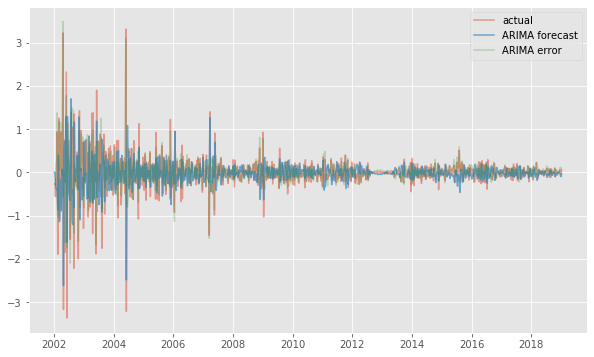

In [52]:
arima_forecast = pd.DataFrame(ARIMA(diff, order=(4,1,1), missing='drop', dates=diff.index.date, freq='W',).fit().predict())
arima_diff = diff.copy()
arima_diff['arima_preds'] = arima_forecast
arima_diff['error'] = arima_diff['cost_per_watt'] - arima_diff['arima_preds']
plt.plot(diff, alpha=0.5, label= 'actual')
plt.plot(arima_forecast, label='ARIMA forecast', alpha=0.7)
plt.plot(arima_diff['error'], label='ARIMA error', alpha=0.2, color='green')
plt.legend(loc='best')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

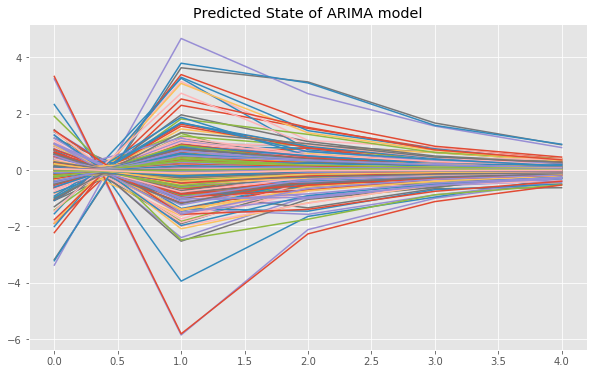

In [53]:
plt.plot(ARIMA(diff, order=(4,1,1), missing='drop', dates=diff.index.date, freq='W',).fit().predicted_state)
plt.title('Predicted State of ARIMA model')
plt.show

In [54]:
ARIMA_MSEs = pd.DataFrame()
ARIMA_MSEs['ARIMA Order[4,0,3]'] = [0.18641189046776047, 0.10443746417508153, 0.32316785758345695]
ARIMA_MSEs['ARIMA Order[4,1,1]'] = [0.186137263786611, 0.11835326053615955, 0.3440250870738347]
ARIMA_MSEs['ARIMA Order[5,1,4]'] = [0.18642433947045156, 0.10909224539847182, 0.330291152467746]
ARIMA_MSEs['ARIMA Order[7,0,1]'] = [0.18565332426281034, 0.10407455903428799, 0.3226058880961226]
ARIMA_MSEs['ARIMA Order[8,0,1]'] = [0.18547858053559843, 0.1039336771654681, 0.3223874643429364]
ARIMA_MSEs['ARIMA Order[15,1,1]']= [0.1863575756707153, 0.10422192313237938, 0.3241894823703004]
ARIMA_MSEs = ARIMA_MSEs.T
ARIMA_MSEs.rename(columns={0:'MAE', 1:'MSE',2:'RMSE'}, inplace=True)
diff_reg_scores = (stat_score_table(diff, tsols_model, tslinear_model, tsrf_model).T).rename(columns={'OLS':'OLS_diff', 'LINEAR':'LINEAR_diff','RF':'RF_diff'})
diff_reg_scores = diff_reg_scores.T
reg_scores = score_table(y, ols_model, linear_model, rf_model)
scores_for_all = pd.concat([reg_scores, diff_reg_scores])
all_s = pd.concat([scores_for_all, ARIMA_MSEs])
all_s

,MAE,MSE,RMSE
OLS,0.189762,0.120843,0.347625
LINEAR,0.555970,0.555970,0.745634
RF,0.072495,0.019823,0.140796
OLS_diff,0.184800,0.115255,0.339493
LINEAR_diff,0.227956,0.227956,0.477447
RF_diff,0.126722,0.061356,0.247701
"ARIMA Order[4,0,3]",0.186412,0.104437,0.323168
"ARIMA Order[4,1,1]",0.186137,0.118353,0.344025
"ARIMA Order[5,1,4]",0.186424,0.109092,0.330291
"ARIMA Order[7,0,1]",0.185653,0.104075,0.322606


In [55]:
print('ARMA Order[1,0] MSE=', mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(1,0)).fit().predict()))
print('ARMA Order[4,0] MSE=', mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(4,0)).fit().predict() ))
print('ARMA Order[4,1] MSE=', mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(4,1)).fit().predict() ))
print('ARMA Order[5,1] MSE=', mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(5,1)).fit().predict() ))
print('ARMA Order[7,0] MSE=', mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(7,0)).fit().predict() ))
print('ARMA Order[8,0] MSE=', mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(8,0)).fit().predict() ))
print('ARMA Order[15,1] MSE=', mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(15,1)).fit().predict() ))
print('=============')
print('ARIMA Order[4,0,3] MSE = {}'.format(mean_squared_error(diff[1:], pd.DataFrame(ARIMA(diff, order=(4,0,3)).fit().forecasts).T[1:])))
print('ARIMA Order[4,1,1] MSE = {}'.format(mean_squared_error(diff[1:], pd.DataFrame(ARIMA(diff, order=(4,1,1)).fit().forecasts).T[1:])))
print('ARIMA Order[5,1,4] MSE = {}'.format(mean_squared_error(diff[1:], pd.DataFrame(ARIMA(diff, order=(5,1,4)).fit().forecasts).T[1:])))
print('ARIMA Order[7,0,1] MSE = {}'.format(mean_squared_error(diff[1:], pd.DataFrame(ARIMA(diff, order=(7,0,1)).fit().forecasts).T[1:])))
print('ARIMA Order[8,0,1] MSE = {}'.format(mean_squared_error(diff[1:], pd.DataFrame(ARIMA(diff, order=(8,0,1)).fit().forecasts).T[1:])))
print('ARIMA Order[15,1,1] MSE = {}'.format(mean_squared_error(diff[1:], pd.DataFrame(ARIMA(diff, order=(15,1,1)).fit().forecasts).T[1:])))

ARMA Order[1,0] MSE= 0.146586257398789
ARMA Order[4,0] MSE= 0.1136606870368262
ARMA Order[4,1] MSE= 0.10782929156125641
ARMA Order[5,1] MSE= 0.1063737838582819
ARMA Order[7,0] MSE= 0.1060237769976894
ARMA Order[8,0] MSE= 0.10587430816678502
ARMA Order[15,1] MSE= 0.10009314946409816
ARIMA Order[4,0,3] MSE = 0.10443746417508153
ARIMA Order[4,1,1] MSE = 0.11835326053615955
ARIMA Order[5,1,4] MSE = 0.10909224539847182
ARIMA Order[7,0,1] MSE = 0.10407455903428799
ARIMA Order[8,0,1] MSE = 0.1039336771654681
ARIMA Order[15,1,1] MSE = 0.10509882047952329


In [57]:
diff_reg_scores = (stat_score_table(diff, tsols_model, tslinear_model, tsrf_model).T).rename(columns={'OLS':'OLS_diff', 'LINEAR':'LINEAR_diff','RF':'RF_diff'})
diff_reg_scores = diff_reg_scores.T
reg_scores = score_table(y, ols_model, linear_model, rf_model)
scores_for_all = pd.concat([reg_scores, diff_reg_scores])
model_mses = scores_for_all[['MSE']].T
model_mses['ARMA Order[8,0]']= mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(8,0)).fit().predict())
model_mses['ARMA Order[15,1]']= mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(15,1)).fit().predict())
model_mses['ARIMA Order[4,0,3]']= mean_squared_error(diff[1:], pd.DataFrame(ARIMA(diff, order=(4,0,3)).fit().forecasts).T[1:])
model_mses['ARIMA Order[7,0,1]'] =mean_squared_error(diff[1:], pd.DataFrame(ARIMA(diff, order=(7,0,1)).fit().forecasts).T[1:])
model_mses['ARIMA Order[8,0,1]'] =mean_squared_error(diff[1:], pd.DataFrame(ARIMA(diff, order=(8,0,1)).fit().forecasts).T[1:])
model_mses.T
model_mses.sort_values(by='MSE')

KeyError: 'MSE'

In [60]:
ts_df = diff[1:]

In [67]:
52*3

156

731

,cost_per_watt
installation_date,
2016-01-17,-0.08
2016-01-24,0.07
2016-01-31,-0.23
2016-02-07,-0.10
2016-02-14,0.01
...,...
2018-12-09,0.01
2018-12-16,0.06
2018-12-23,0.04


In [85]:
y_hat.index[0]

Timestamp('2002-01-13 00:00:00', freq='W-SUN')

In [86]:
actual = ts_df[len(ts_df) - (52*3):]

In [89]:
actual.index[-1]

Timestamp('2019-01-06 00:00:00', freq='W-SUN')

In [78]:
ts_df[len(ts_df) - (52*3):]

,cost_per_watt
installation_date,
2016-01-17,-0.08
2016-01-24,0.07
2016-01-31,-0.23
2016-02-07,-0.10
2016-02-14,0.01
...,...
2018-12-09,0.01
2018-12-16,0.06
2018-12-23,0.04


In [70]:
y_hat = ts_df[:len(ts_df) - (52*3)]

In [175]:
print("y_hat's timeframe  : ", str(y_hat.index.date[[0,-1]]))
print("actual's timeframe :", str(actual.index.date[[0,-1]]))

y_hat's timeframe  :  [datetime.date(2002, 1, 13) datetime.date(2016, 1, 10)]
actual's timeframe : [datetime.date(2016, 1, 17) datetime.date(2019, 1, 6)]


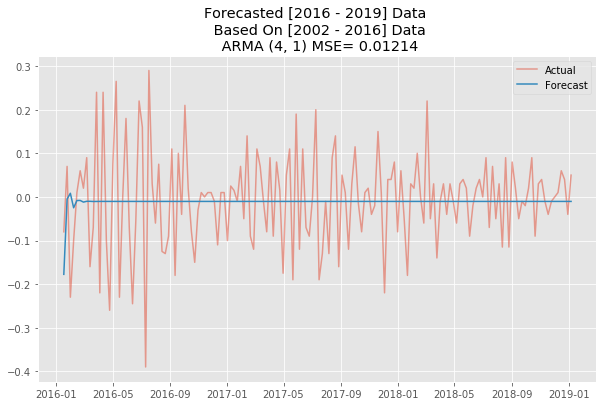

In [179]:
order= (4,1)
ts_df = diff.dropna()
#removing the last three years of observations as hold out for forecasting
y_hat = ts_df[:len(ts_df) - (52*3)]
actual = ts_df[len(ts_df) - (52*3):]
arma_pred = ARMA(y_hat, order=order, freq='W').fit().predict(start=actual.index.date[0], end=actual.index.date[-1])

actual_date_s, actual_date_e = actual.index.year[0], actual.index.year[-1]
forcst_date_s, forcst_date_e = y_hat.index.year[0], y_hat.index.year[-1]

plt.plot(actual, label='Actual', alpha=0.5)
plt.plot(arma_pred, label= 'Forecast')
plt.legend(loc='best')
plt.title('Forecasted [{} - {}] Data \n Based On [{} - {}] Data\n ARMA {} MSE= {}'.format(
                            actual_date_s, actual_date_e, 
                            forcst_date_s, forcst_date_e,order,
                            round(mean_squared_error(actual, arma_pred),5)))
plt.show()




In [94]:
%autoreload

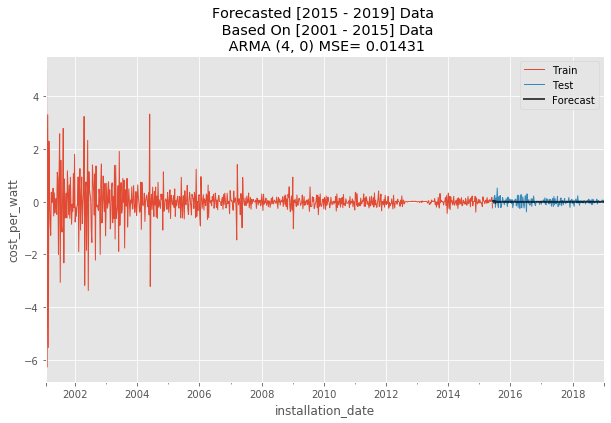

In [95]:
arma_model(diff,order=(4,0), years_off= 0, plot=True, use_years=False)

In [ ]:
plt.plot(ax=ax, label='Forecast', color='black', alpha=0.7,linewidth=2)

In [96]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:


train.plot(ax=ax, label='Train', linewidth=1)
test.plot(ax=ax, label='Test', linewidth=1)
pred.plot(ax=ax, label='Forecast', color='black', 

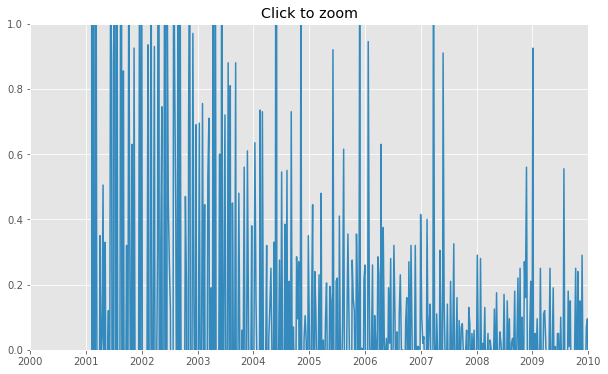

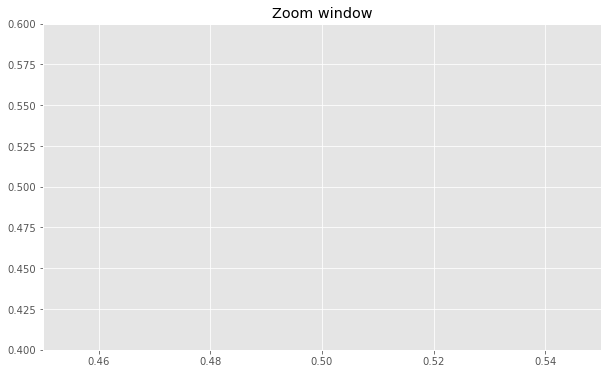

In [100]:
idx = round(len(diff) * .8)
train= diff[:idx]
test = diff[idx:]
order=(4,0)
pred = ARMA(train, order).fit().predict(start=test.index.date[0],end=test.index.date[-1])

figsrc, axsrc = plt.subplots()
figzoom, axzoom = plt.subplots()
axsrc.set(xlim=(0, 1), ylim=(0, 1), autoscale_on=False,
          title='Click to zoom')
axzoom.set(xlim=(0.45, 0.55), ylim=(0.4, 0.6), autoscale_on=False,
           title='Zoom window') 

axsrc.plot(test, pred, train)
axzoom.plot(test, pred)


def onpress(event):
    if event.button != 1:
        return
    test, train = event.xdata, event.ydata
    axzoom.set_xlim(x - 0.1, x + 0.1)
    axzoom.set_ylim(y - 0.1, y + 0.1)
    figzoom.canvas.draw()

figsrc.canvas.mpl_connect('button_press_event', onpress)
plt.show()

In [154]:


str(actual.index.date[0])[:7]


'2016-01'

In [128]:
diff.index[0].month_name()

'January'

In [ ]:
actual_date_s = actual.index.month_name()[0] +' '+ str(actual.index.year[0])
actual_date_e = actual.index.month_name()[-1] +' '+ str(actual.index.year[-1])
forcst_date_s = y_hat.index.month_name()[0] + ' ' + str(y_hat.index.year[0])
forcst_date_e = y_hat.index.month_name()[-1] + ' ' + str(y_hat.index.year[-1])

In [183]:
pip install forecast-x

Note: you may need to restart the kernel to use updated packages.


In [185]:
import forecast_x

In [186]:
from forecast_x import forecast_x as fx

In [ ]:
forecast_x.forecast_x.forecast.best_model()

In [ ]:
fx.forecast

In [189]:
from sktime.forecasters import ARIMAForecaster
from sktime.forecasters import ExpSmoothingForecaster
from sktime.forecasters import EnsembleForecaster
from sktime.highlevel.tasks import ForecastingTask
from sktime.highlevel.strategies import ForecastingStrategy
from sktime.highlevel.strategies import Forecasting2TSRReductionStrategy
from sktime.datasets import load_shampoo_sales
from sktime.datasets import load_longley
from sktime.transformers.compose import Tabulariser
from sktime.pipeline import Pipeline

In [345]:
print('ARMA Order[1,0] MSE=', mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(1,0)).fit().predict()))
print('ARMA Order[4,0] MSE=', mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(4,0)).fit().predict() ))
print('ARMA Order[4,1] MSE=', mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(4,1)).fit().predict() ))
print('ARMA Order[5,1] MSE=', mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(5,1)).fit().predict() ))
print('ARMA Order[7,0] MSE=', mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(7,0)).fit().predict() ))
print('ARMA Order[8,0] MSE=', mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(8,0)).fit().predict() ))
print('ARMA Order[15,1] MSE=', mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(15,1)).fit().predict() ))
print('=============')
print('ARIMA Order[4,0,3] MSE = {}'.format(mean_squared_error(diff[1:], pd.DataFrame(ARIMA(diff, order=(4,0,3)).fit().forecasts).T[1:])))
print('ARIMA Order[4,1,1] MSE = {}'.format(mean_squared_error(diff[1:], pd.DataFrame(ARIMA(diff, order=(4,1,1)).fit().forecasts).T[1:])))
print('ARIMA Order[5,1,4] MSE = {}'.format(mean_squared_error(diff[1:], pd.DataFrame(ARIMA(diff, order=(5,1,4)).fit().forecasts).T[1:])))
print('ARIMA Order[7,0,1] MSE = {}'.format(mean_squared_error(diff[1:], pd.DataFrame(ARIMA(diff, order=(7,0,1)).fit().forecasts).T[1:])))
print('ARIMA Order[8,0,1] MSE = {}'.format(mean_squared_error(diff[1:], pd.DataFrame(ARIMA(diff, order=(8,0,1)).fit().forecasts).T[1:])))
print('ARIMA Order[15,1,1] MSE = {}'.format(mean_squared_error(diff[1:], pd.DataFrame(ARIMA(diff, order=(15,1,1)).fit().forecasts).T[1:])))

ARMA Order[1,0] MSE= 0.146586257398789
ARMA Order[4,0] MSE= 0.1136606870368262
ARMA Order[4,1] MSE= 0.10782929156125641
ARMA Order[5,1] MSE= 0.1063737838582819
ARMA Order[7,0] MSE= 0.1060237769976894
ARMA Order[8,0] MSE= 0.10587430816678502
ARMA Order[15,1] MSE= 0.10009314946409816
ARIMA Order[4,0,3] MSE = 0.10443746417508153
ARIMA Order[4,1,1] MSE = 0.11835326053615955
ARIMA Order[5,1,4] MSE = 0.10909224539847182
ARIMA Order[7,0,1] MSE = 0.10407455903428799
ARIMA Order[8,0,1] MSE = 0.1039336771654681
ARIMA Order[15,1,1] MSE = 0.10509882047952329


In [315]:
ts_df = diff[1:]
tsdf = ts_df['cost_per_watt']
tsdf.reset_index(drop=True, inplace=True)

train = pd.Series([tsdf[:625]])
test = pd.Series([tsdf[625:]])
m = ARIMAForecaster(order=(4,0,3))
m.fit(train)
fh = np.arange(1, 263)
y_pred = m.predict(fh=fh)
# evaluate forecasts using default scorer (mean squared error)
print('MSE =', m.score(test, fh=fh)**2)

MSE = 0.015433975244944642


In [344]:
%autoreload

In [338]:
m.score(test, fh=fh)**2

0.016441518703293342

In [342]:
skt_mse

0.016441518703293342

In [263]:
idx = round(len(diff) * .7)

In [265]:
diff[idx:]

,cost_per_watt
installation_date,
2013-12-08,-0.15
2013-12-15,0.22
2013-12-22,-0.45
2013-12-29,0.03
2014-01-05,0.32
...,...
2018-12-09,0.01
2018-12-16,0.06
2018-12-23,0.04


In [346]:
pwd

'/Users/jenniferpaige/getit/Solar/PREV'

In [347]:
from tqdm import tqdm_notebook as tqdm

In [3]:
pip install fireTS

Note: you may need to restart the kernel to use updated packages.


In [4]:

from sklearn.ensemble import RandomForestRegressor

/Users/jenniferpaige/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.regression module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#NARX Model
from fireTS.models import NARX

x = np.random.randn(100, 1)
y = np.random.randn(100)
mdl = NARX(RandomForestRegressor(), auto_order=2, exog_order=[2], exog_delay=[1])
mdl.fit(x, y)
ypred = mdl.predict(x, y, step=3)

In [ ]:
#DirectAutoRegressor Model
from fireTS.models import DirectAutoRegressor

x = np.random.randn(100, 1)
y = np.random.randn(100)
mdl = DirectAutoRegressor(RandomForestRegressor(), 
                          auto_order=2, 
                          exog_order=[2], 
                          exog_delay=[1], 
                          pred_step=3)
mdl.fit(x, y)
ypred = mdl.predict(x, y)

In [ ]:
#Grid Search 
x = np.random.randn(100, 1)
y = np.random.randn(100)

# DirectAutoRegressor can do grid search as well
mdl = NARX(RandomForestRegressor(), auto_order=2, exog_order=[2], exog_delay=[1])

# Grid search
para_grid = {'n_estimators': [10, 30, 100]}
mdl.grid_search(x, y, para_grid, verbose=2)

# Best hyper-parameters are set after grid search, print the model to see the difference
print(mdl)

# Fit the model and make the prediction
mdl.fit(x, y)
ypred = mdl.predict(x, y, step=3)
The examples folder provides more realistic exam

In [ ]:
##rf_reg = RandomForestRegressor()
#scores = []
#for i in range(5):
#    result = next(kf.split(train_input), None)
#    print(result)
#    x_train = train_input[result[0]]
#    print(x_train)
#    x_test = train_input[result[1]]
#    y_train = train_output[result[0]]
#    y_test = train_output[result[1]]
#    model = my_model.fit(x_train,y_train)
#    predictions = my_model.predict(x_test)
#    np.append(scores,model.score(x_test,y_test))
#print('Scores from each Iteration: ', scores)
#print('Average K-Fold Score :' , np.mean(scores))

In [5]:
pwd

'/Users/jenniferpaige/getit/Solar/PREV'

In [51]:
train

installation_date
2001-01-28    4.275
2001-02-04    4.970
2001-02-11   -6.270
2001-02-18    3.290
2001-02-25   -5.530
              ...  
2015-05-10    0.030
2015-05-17    0.000
2015-05-24    0.100
2015-05-31    0.160
2015-06-07   -0.240
Freq: W-SUN, Name: cost_per_watt, Length: 750, dtype: float64

In [52]:
test

installation_date
2015-06-14    0.045
2015-06-21   -0.065
2015-06-28    0.180
2015-07-05    0.230
2015-07-12   -0.220
              ...  
2018-12-09    0.010
2018-12-16    0.060
2018-12-23    0.040
2018-12-30   -0.040
2019-01-06    0.050
Freq: W-SUN, Name: cost_per_watt, Length: 187, dtype: float64

In [53]:
train= diff[:round(len(diff)*.8)]
test = diff[len(train):]
order=(4,0,3)
pred = ARIMA(train, order=order, freq='W').fit().predict(start=test.index.date[0],end=test.index.date[-1])

In [56]:
train.iloc[0]

4.275

[Text(0, 0.5, 'cost_per_watt')]

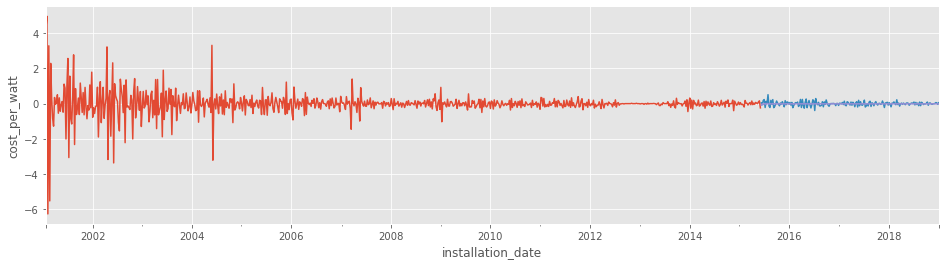

In [58]:
fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
train.plot(ax=ax, label='Train')
test.plot(ax=ax, label='Test')
pred.plot(ax=ax, label='Forecast')
ax.set(ylabel='cost_per_watt')
plt.

In [59]:
%autoreload

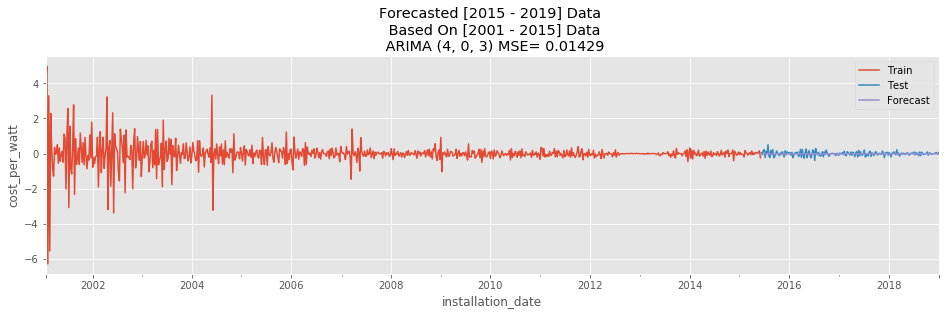

In [60]:
arima_model(diff, (4,0,3), 0, True, False)

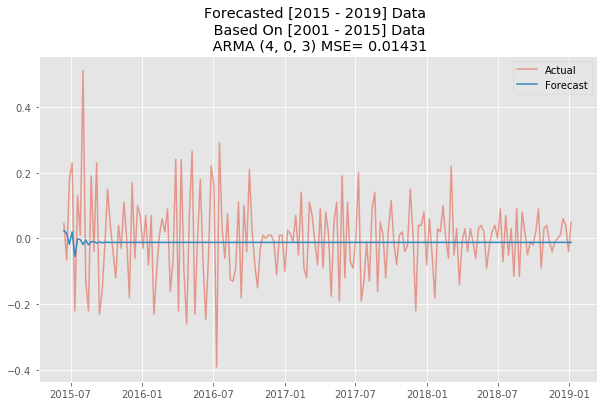

In [46]:
arima_model(diff, (4,0,3), 0, True, False)

In [47]:
arima_model(diff, (4,0,3), 0, False, False)

ARIMA Order Used: (4, 0, 3)
MSE: 0.01431


AttributeError: 'numpy.float64' object has no attribute 'plot'

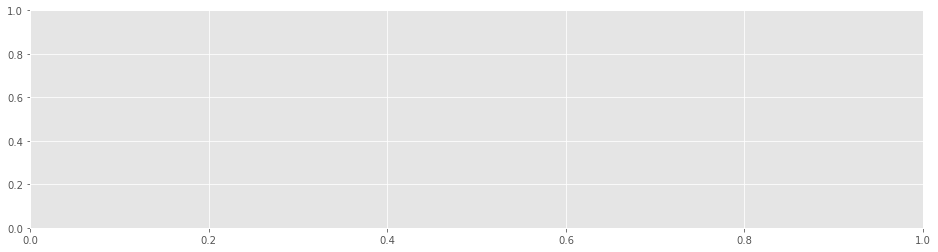

In [49]:
arima_model(diff, (4,0,3), 0, True, False)

In [101]:
pwd

'/Users/jenniferpaige/getit/Solar'

In [106]:
diff.reshape(-1, 1)

AttributeError: 'Series' object has no attribute 'reshape'

In [108]:
diff

installation_date
2001-01-28    4.275
2001-02-04    4.970
2001-02-11   -6.270
2001-02-18    3.290
2001-02-25   -5.530
              ...  
2018-12-09    0.010
2018-12-16    0.060
2018-12-23    0.040
2018-12-30   -0.040
2019-01-06    0.050
Freq: W-SUN, Name: cost_per_watt, Length: 937, dtype: float64

In [107]:
X = diff.index
y = diff
rf_model = RandomForestRegressor().fit(X,y)
rf_trend = rf_model.predict(X)

ValueError: Expected 2D array, got 1D array instead:
array=[9.8063999e+17 9.8124479e+17 9.8184959e+17 9.8245439e+17 9.8305919e+17
 9.8366399e+17 9.8426879e+17 9.8487359e+17 9.8547839e+17 9.8608319e+17
 9.8668799e+17 9.8729279e+17 9.8789759e+17 9.8850239e+17 9.8910719e+17
 9.8971199e+17 9.9031679e+17 9.9092159e+17 9.9152639e+17 9.9213119e+17
 9.9273599e+17 9.9334079e+17 9.9394559e+17 9.9455039e+17 9.9515519e+17
 9.9575999e+17 9.9636479e+17 9.9696959e+17 9.9757439e+17 9.9817919e+17
 9.9878399e+17 9.9938879e+17 9.9999359e+17 1.0005984e+18 1.0012032e+18
 1.0018080e+18 1.0024128e+18 1.0030176e+18 1.0036224e+18 1.0042272e+18
 1.0048320e+18 1.0054368e+18 1.0060416e+18 1.0066464e+18 1.0072512e+18
 1.0078560e+18 1.0084608e+18 1.0090656e+18 1.0096704e+18 1.0102752e+18
 1.0108800e+18 1.0114848e+18 1.0120896e+18 1.0126944e+18 1.0132992e+18
 1.0139040e+18 1.0145088e+18 1.0151136e+18 1.0157184e+18 1.0163232e+18
 1.0169280e+18 1.0175328e+18 1.0181376e+18 1.0187424e+18 1.0193472e+18
 1.0199520e+18 1.0205568e+18 1.0211616e+18 1.0217664e+18 1.0223712e+18
 1.0229760e+18 1.0235808e+18 1.0241856e+18 1.0247904e+18 1.0253952e+18
 1.0260000e+18 1.0266048e+18 1.0272096e+18 1.0278144e+18 1.0284192e+18
 1.0290240e+18 1.0296288e+18 1.0302336e+18 1.0308384e+18 1.0314432e+18
 1.0320480e+18 1.0326528e+18 1.0332576e+18 1.0338624e+18 1.0344672e+18
 1.0350720e+18 1.0356768e+18 1.0362816e+18 1.0368864e+18 1.0374912e+18
 1.0380960e+18 1.0387008e+18 1.0393056e+18 1.0399104e+18 1.0405152e+18
 1.0411200e+18 1.0417248e+18 1.0423296e+18 1.0429344e+18 1.0435392e+18
 1.0441440e+18 1.0447488e+18 1.0453536e+18 1.0459584e+18 1.0465632e+18
 1.0471680e+18 1.0477728e+18 1.0483776e+18 1.0489824e+18 1.0495872e+18
 1.0501920e+18 1.0507968e+18 1.0514016e+18 1.0520064e+18 1.0526112e+18
 1.0532160e+18 1.0538208e+18 1.0544256e+18 1.0550304e+18 1.0556352e+18
 1.0562400e+18 1.0568448e+18 1.0574496e+18 1.0580544e+18 1.0586592e+18
 1.0592640e+18 1.0598688e+18 1.0604736e+18 1.0610784e+18 1.0616832e+18
 1.0622880e+18 1.0628928e+18 1.0634976e+18 1.0641024e+18 1.0647072e+18
 1.0653120e+18 1.0659168e+18 1.0665216e+18 1.0671264e+18 1.0677312e+18
 1.0683360e+18 1.0689408e+18 1.0695456e+18 1.0701504e+18 1.0707552e+18
 1.0713600e+18 1.0719648e+18 1.0725696e+18 1.0731744e+18 1.0737792e+18
 1.0743840e+18 1.0749888e+18 1.0755936e+18 1.0761984e+18 1.0768032e+18
 1.0774080e+18 1.0780128e+18 1.0786176e+18 1.0792224e+18 1.0798272e+18
 1.0804320e+18 1.0810368e+18 1.0816416e+18 1.0822464e+18 1.0828512e+18
 1.0834560e+18 1.0840608e+18 1.0846656e+18 1.0852704e+18 1.0858752e+18
 1.0864800e+18 1.0870848e+18 1.0876896e+18 1.0882944e+18 1.0888992e+18
 1.0895040e+18 1.0901088e+18 1.0907136e+18 1.0913184e+18 1.0919232e+18
 1.0925280e+18 1.0931328e+18 1.0937376e+18 1.0943424e+18 1.0949472e+18
 1.0955520e+18 1.0961568e+18 1.0967616e+18 1.0973664e+18 1.0979712e+18
 1.0985760e+18 1.0991808e+18 1.0997856e+18 1.1003904e+18 1.1009952e+18
 1.1016000e+18 1.1022048e+18 1.1028096e+18 1.1034144e+18 1.1040192e+18
 1.1046240e+18 1.1052288e+18 1.1058336e+18 1.1064384e+18 1.1070432e+18
 1.1076480e+18 1.1082528e+18 1.1088576e+18 1.1094624e+18 1.1100672e+18
 1.1106720e+18 1.1112768e+18 1.1118816e+18 1.1124864e+18 1.1130912e+18
 1.1136960e+18 1.1143008e+18 1.1149056e+18 1.1155104e+18 1.1161152e+18
 1.1167200e+18 1.1173248e+18 1.1179296e+18 1.1185344e+18 1.1191392e+18
 1.1197440e+18 1.1203488e+18 1.1209536e+18 1.1215584e+18 1.1221632e+18
 1.1227680e+18 1.1233728e+18 1.1239776e+18 1.1245824e+18 1.1251872e+18
 1.1257920e+18 1.1263968e+18 1.1270016e+18 1.1276064e+18 1.1282112e+18
 1.1288160e+18 1.1294208e+18 1.1300256e+18 1.1306304e+18 1.1312352e+18
 1.1318400e+18 1.1324448e+18 1.1330496e+18 1.1336544e+18 1.1342592e+18
 1.1348640e+18 1.1354688e+18 1.1360736e+18 1.1366784e+18 1.1372832e+18
 1.1378880e+18 1.1384928e+18 1.1390976e+18 1.1397024e+18 1.1403072e+18
 1.1409120e+18 1.1415168e+18 1.1421216e+18 1.1427264e+18 1.1433312e+18
 1.1439360e+18 1.1445408e+18 1.1451456e+18 1.1457504e+18 1.1463552e+18
 1.1469600e+18 1.1475648e+18 1.1481696e+18 1.1487744e+18 1.1493792e+18
 1.1499840e+18 1.1505888e+18 1.1511936e+18 1.1517984e+18 1.1524032e+18
 1.1530080e+18 1.1536128e+18 1.1542176e+18 1.1548224e+18 1.1554272e+18
 1.1560320e+18 1.1566368e+18 1.1572416e+18 1.1578464e+18 1.1584512e+18
 1.1590560e+18 1.1596608e+18 1.1602656e+18 1.1608704e+18 1.1614752e+18
 1.1620800e+18 1.1626848e+18 1.1632896e+18 1.1638944e+18 1.1644992e+18
 1.1651040e+18 1.1657088e+18 1.1663136e+18 1.1669184e+18 1.1675232e+18
 1.1681280e+18 1.1687328e+18 1.1693376e+18 1.1699424e+18 1.1705472e+18
 1.1711520e+18 1.1717568e+18 1.1723616e+18 1.1729664e+18 1.1735712e+18
 1.1741760e+18 1.1747808e+18 1.1753856e+18 1.1759904e+18 1.1765952e+18
 1.1772000e+18 1.1778048e+18 1.1784096e+18 1.1790144e+18 1.1796192e+18
 1.1802240e+18 1.1808288e+18 1.1814336e+18 1.1820384e+18 1.1826432e+18
 1.1832480e+18 1.1838528e+18 1.1844576e+18 1.1850624e+18 1.1856672e+18
 1.1862720e+18 1.1868768e+18 1.1874816e+18 1.1880864e+18 1.1886912e+18
 1.1892960e+18 1.1899008e+18 1.1905056e+18 1.1911104e+18 1.1917152e+18
 1.1923200e+18 1.1929248e+18 1.1935296e+18 1.1941344e+18 1.1947392e+18
 1.1953440e+18 1.1959488e+18 1.1965536e+18 1.1971584e+18 1.1977632e+18
 1.1983680e+18 1.1989728e+18 1.1995776e+18 1.2001824e+18 1.2007872e+18
 1.2013920e+18 1.2019968e+18 1.2026016e+18 1.2032064e+18 1.2038112e+18
 1.2044160e+18 1.2050208e+18 1.2056256e+18 1.2062304e+18 1.2068352e+18
 1.2074400e+18 1.2080448e+18 1.2086496e+18 1.2092544e+18 1.2098592e+18
 1.2104640e+18 1.2110688e+18 1.2116736e+18 1.2122784e+18 1.2128832e+18
 1.2134880e+18 1.2140928e+18 1.2146976e+18 1.2153024e+18 1.2159072e+18
 1.2165120e+18 1.2171168e+18 1.2177216e+18 1.2183264e+18 1.2189312e+18
 1.2195360e+18 1.2201408e+18 1.2207456e+18 1.2213504e+18 1.2219552e+18
 1.2225600e+18 1.2231648e+18 1.2237696e+18 1.2243744e+18 1.2249792e+18
 1.2255840e+18 1.2261888e+18 1.2267936e+18 1.2273984e+18 1.2280032e+18
 1.2286080e+18 1.2292128e+18 1.2298176e+18 1.2304224e+18 1.2310272e+18
 1.2316320e+18 1.2322368e+18 1.2328416e+18 1.2334464e+18 1.2340512e+18
 1.2346560e+18 1.2352608e+18 1.2358656e+18 1.2364704e+18 1.2370752e+18
 1.2376800e+18 1.2382848e+18 1.2388896e+18 1.2394944e+18 1.2400992e+18
 1.2407040e+18 1.2413088e+18 1.2419136e+18 1.2425184e+18 1.2431232e+18
 1.2437280e+18 1.2443328e+18 1.2449376e+18 1.2455424e+18 1.2461472e+18
 1.2467520e+18 1.2473568e+18 1.2479616e+18 1.2485664e+18 1.2491712e+18
 1.2497760e+18 1.2503808e+18 1.2509856e+18 1.2515904e+18 1.2521952e+18
 1.2528000e+18 1.2534048e+18 1.2540096e+18 1.2546144e+18 1.2552192e+18
 1.2558240e+18 1.2564288e+18 1.2570336e+18 1.2576384e+18 1.2582432e+18
 1.2588480e+18 1.2594528e+18 1.2600576e+18 1.2606624e+18 1.2612672e+18
 1.2618720e+18 1.2624768e+18 1.2630816e+18 1.2636864e+18 1.2642912e+18
 1.2648960e+18 1.2655008e+18 1.2661056e+18 1.2667104e+18 1.2673152e+18
 1.2679200e+18 1.2685248e+18 1.2691296e+18 1.2697344e+18 1.2703392e+18
 1.2709440e+18 1.2715488e+18 1.2721536e+18 1.2727584e+18 1.2733632e+18
 1.2739680e+18 1.2745728e+18 1.2751776e+18 1.2757824e+18 1.2763872e+18
 1.2769920e+18 1.2775968e+18 1.2782016e+18 1.2788064e+18 1.2794112e+18
 1.2800160e+18 1.2806208e+18 1.2812256e+18 1.2818304e+18 1.2824352e+18
 1.2830400e+18 1.2836448e+18 1.2842496e+18 1.2848544e+18 1.2854592e+18
 1.2860640e+18 1.2866688e+18 1.2872736e+18 1.2878784e+18 1.2884832e+18
 1.2890880e+18 1.2896928e+18 1.2902976e+18 1.2909024e+18 1.2915072e+18
 1.2921120e+18 1.2927168e+18 1.2933216e+18 1.2939264e+18 1.2945312e+18
 1.2951360e+18 1.2957408e+18 1.2963456e+18 1.2969504e+18 1.2975552e+18
 1.2981600e+18 1.2987649e+18 1.2993696e+18 1.2999745e+18 1.3005792e+18
 1.3011841e+18 1.3017888e+18 1.3023937e+18 1.3029984e+18 1.3036033e+18
 1.3042080e+18 1.3048129e+18 1.3054176e+18 1.3060225e+18 1.3066272e+18
 1.3072321e+18 1.3078368e+18 1.3084417e+18 1.3090464e+18 1.3096513e+18
 1.3102560e+18 1.3108609e+18 1.3114656e+18 1.3120705e+18 1.3126752e+18
 1.3132801e+18 1.3138848e+18 1.3144897e+18 1.3150944e+18 1.3156993e+18
 1.3163040e+18 1.3169089e+18 1.3175136e+18 1.3181185e+18 1.3187232e+18
 1.3193281e+18 1.3199328e+18 1.3205377e+18 1.3211424e+18 1.3217473e+18
 1.3223520e+18 1.3229569e+18 1.3235616e+18 1.3241665e+18 1.3247712e+18
 1.3253761e+18 1.3259808e+18 1.3265857e+18 1.3271904e+18 1.3277953e+18
 1.3284000e+18 1.3290049e+18 1.3296096e+18 1.3302145e+18 1.3308192e+18
 1.3314241e+18 1.3320288e+18 1.3326337e+18 1.3332384e+18 1.3338433e+18
 1.3344480e+18 1.3350529e+18 1.3356576e+18 1.3362625e+18 1.3368672e+18
 1.3374721e+18 1.3380768e+18 1.3386817e+18 1.3392864e+18 1.3398913e+18
 1.3404960e+18 1.3411009e+18 1.3417056e+18 1.3423105e+18 1.3429152e+18
 1.3435201e+18 1.3441248e+18 1.3447297e+18 1.3453344e+18 1.3459393e+18
 1.3465440e+18 1.3471489e+18 1.3477536e+18 1.3483585e+18 1.3489632e+18
 1.3495681e+18 1.3501728e+18 1.3507777e+18 1.3513824e+18 1.3519873e+18
 1.3525920e+18 1.3531969e+18 1.3538016e+18 1.3544065e+18 1.3550112e+18
 1.3556161e+18 1.3562208e+18 1.3568257e+18 1.3574304e+18 1.3580353e+18
 1.3586400e+18 1.3592449e+18 1.3598496e+18 1.3604545e+18 1.3610592e+18
 1.3616641e+18 1.3622688e+18 1.3628737e+18 1.3634784e+18 1.3640833e+18
 1.3646880e+18 1.3652929e+18 1.3658976e+18 1.3665025e+18 1.3671072e+18
 1.3677121e+18 1.3683168e+18 1.3689217e+18 1.3695264e+18 1.3701313e+18
 1.3707360e+18 1.3713409e+18 1.3719456e+18 1.3725505e+18 1.3731552e+18
 1.3737601e+18 1.3743648e+18 1.3749697e+18 1.3755744e+18 1.3761793e+18
 1.3767840e+18 1.3773889e+18 1.3779936e+18 1.3785985e+18 1.3792032e+18
 1.3798081e+18 1.3804128e+18 1.3810177e+18 1.3816224e+18 1.3822273e+18
 1.3828320e+18 1.3834369e+18 1.3840416e+18 1.3846465e+18 1.3852512e+18
 1.3858561e+18 1.3864608e+18 1.3870657e+18 1.3876704e+18 1.3882753e+18
 1.3888800e+18 1.3894849e+18 1.3900896e+18 1.3906945e+18 1.3912992e+18
 1.3919041e+18 1.3925088e+18 1.3931137e+18 1.3937184e+18 1.3943233e+18
 1.3949280e+18 1.3955329e+18 1.3961376e+18 1.3967425e+18 1.3973472e+18
 1.3979519e+18 1.3985568e+18 1.3991615e+18 1.3997664e+18 1.4003711e+18
 1.4009760e+18 1.4015807e+18 1.4021856e+18 1.4027903e+18 1.4033952e+18
 1.4039999e+18 1.4046048e+18 1.4052095e+18 1.4058144e+18 1.4064191e+18
 1.4070240e+18 1.4076287e+18 1.4082336e+18 1.4088383e+18 1.4094432e+18
 1.4100479e+18 1.4106528e+18 1.4112575e+18 1.4118624e+18 1.4124671e+18
 1.4130720e+18 1.4136767e+18 1.4142816e+18 1.4148863e+18 1.4154912e+18
 1.4160959e+18 1.4167008e+18 1.4173055e+18 1.4179104e+18 1.4185151e+18
 1.4191200e+18 1.4197247e+18 1.4203296e+18 1.4209343e+18 1.4215392e+18
 1.4221439e+18 1.4227488e+18 1.4233535e+18 1.4239584e+18 1.4245631e+18
 1.4251680e+18 1.4257727e+18 1.4263776e+18 1.4269823e+18 1.4275872e+18
 1.4281919e+18 1.4287968e+18 1.4294015e+18 1.4300064e+18 1.4306111e+18
 1.4312160e+18 1.4318207e+18 1.4324256e+18 1.4330303e+18 1.4336352e+18
 1.4342399e+18 1.4348448e+18 1.4354495e+18 1.4360544e+18 1.4366591e+18
 1.4372640e+18 1.4378687e+18 1.4384736e+18 1.4390783e+18 1.4396832e+18
 1.4402879e+18 1.4408928e+18 1.4414975e+18 1.4421024e+18 1.4427071e+18
 1.4433120e+18 1.4439167e+18 1.4445216e+18 1.4451263e+18 1.4457312e+18
 1.4463359e+18 1.4469408e+18 1.4475455e+18 1.4481504e+18 1.4487551e+18
 1.4493600e+18 1.4499647e+18 1.4505696e+18 1.4511743e+18 1.4517792e+18
 1.4523839e+18 1.4529888e+18 1.4535935e+18 1.4541984e+18 1.4548031e+18
 1.4554080e+18 1.4560127e+18 1.4566176e+18 1.4572223e+18 1.4578272e+18
 1.4584319e+18 1.4590368e+18 1.4596415e+18 1.4602464e+18 1.4608511e+18
 1.4614560e+18 1.4620607e+18 1.4626656e+18 1.4632703e+18 1.4638752e+18
 1.4644799e+18 1.4650848e+18 1.4656895e+18 1.4662944e+18 1.4668991e+18
 1.4675040e+18 1.4681087e+18 1.4687136e+18 1.4693183e+18 1.4699232e+18
 1.4705279e+18 1.4711328e+18 1.4717375e+18 1.4723424e+18 1.4729471e+18
 1.4735520e+18 1.4741567e+18 1.4747616e+18 1.4753663e+18 1.4759712e+18
 1.4765759e+18 1.4771808e+18 1.4777855e+18 1.4783904e+18 1.4789951e+18
 1.4796000e+18 1.4802047e+18 1.4808096e+18 1.4814143e+18 1.4820192e+18
 1.4826239e+18 1.4832288e+18 1.4838335e+18 1.4844384e+18 1.4850431e+18
 1.4856480e+18 1.4862527e+18 1.4868576e+18 1.4874623e+18 1.4880672e+18
 1.4886719e+18 1.4892768e+18 1.4898815e+18 1.4904864e+18 1.4910911e+18
 1.4916960e+18 1.4923007e+18 1.4929056e+18 1.4935103e+18 1.4941152e+18
 1.4947199e+18 1.4953248e+18 1.4959296e+18 1.4965344e+18 1.4971392e+18
 1.4977440e+18 1.4983488e+18 1.4989536e+18 1.4995584e+18 1.5001632e+18
 1.5007680e+18 1.5013728e+18 1.5019776e+18 1.5025824e+18 1.5031872e+18
 1.5037920e+18 1.5043968e+18 1.5050016e+18 1.5056064e+18 1.5062112e+18
 1.5068160e+18 1.5074208e+18 1.5080256e+18 1.5086304e+18 1.5092352e+18
 1.5098400e+18 1.5104448e+18 1.5110496e+18 1.5116544e+18 1.5122592e+18
 1.5128640e+18 1.5134688e+18 1.5140736e+18 1.5146784e+18 1.5152832e+18
 1.5158880e+18 1.5164928e+18 1.5170976e+18 1.5177024e+18 1.5183072e+18
 1.5189120e+18 1.5195168e+18 1.5201216e+18 1.5207264e+18 1.5213312e+18
 1.5219360e+18 1.5225408e+18 1.5231456e+18 1.5237504e+18 1.5243552e+18
 1.5249600e+18 1.5255648e+18 1.5261696e+18 1.5267744e+18 1.5273792e+18
 1.5279840e+18 1.5285888e+18 1.5291936e+18 1.5297984e+18 1.5304032e+18
 1.5310080e+18 1.5316128e+18 1.5322176e+18 1.5328224e+18 1.5334272e+18
 1.5340320e+18 1.5346368e+18 1.5352416e+18 1.5358464e+18 1.5364512e+18
 1.5370560e+18 1.5376608e+18 1.5382656e+18 1.5388704e+18 1.5394752e+18
 1.5400800e+18 1.5406848e+18 1.5412896e+18 1.5418944e+18 1.5424992e+18
 1.5431040e+18 1.5437088e+18 1.5443136e+18 1.5449184e+18 1.5455232e+18
 1.5461280e+18 1.5467328e+18].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [111]:
diff

installation_date
2001-01-28    4.275
2001-02-04    4.970
2001-02-11   -6.270
2001-02-18    3.290
2001-02-25   -5.530
              ...  
2018-12-09    0.010
2018-12-16    0.060
2018-12-23    0.040
2018-12-30   -0.040
2019-01-06    0.050
Freq: W-SUN, Name: cost_per_watt, Length: 937, dtype: float64

In [113]:
from statsmodels.tsa import holtwinters

In [114]:
from statsmodels.tsa.holtwinters import *

In [115]:
%autoreload

In [ ]:
holtwinters.Holt

installation_date
2001-01-28    4.275
2001-02-04    4.970
2001-02-11   -6.270
2001-02-18    3.290
2001-02-25   -5.530
              ...  
2018-12-09    0.010
2018-12-16    0.060
2018-12-23    0.040
2018-12-30   -0.040
2019-01-06    0.050
Freq: W-SUN, Name: cost_per_watt, Length: 937, dtype: float64

In [127]:
holt_linear_model(dfi)

TypeError: object of type 'PytestTester' has no len()

In [128]:
y_hat_avg = dfi.copy()

In [129]:
fit1 = Holt(np.asarray(df['cost_per_watt'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)

In [130]:
fit1

In [133]:
fit1.forecast()

array([4.42864264])

In [138]:
dfi = dfi.dropna()

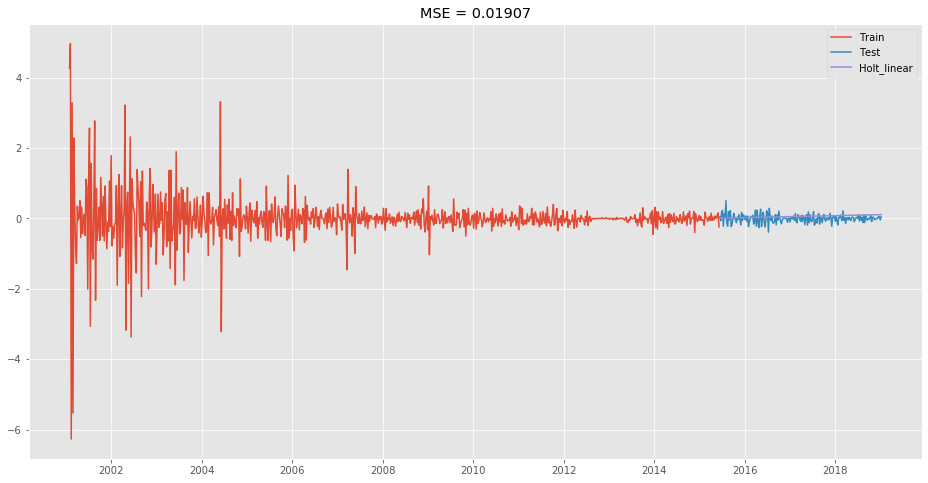

In [146]:
idx = round(len(dfi) * .8)
train = dfi[:idx]
test = dfi[idx:]
fit1 = Holt(np.asarray(train['cost_per_watt'])).fit()
test['Holt_linear'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['cost_per_watt'], label='Train')
plt.plot(test['cost_per_watt'], label='Test')
plt.plot(test['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
mse = mean_squared_error(test['cost_per_watt'],test['Holt_linear'])
plt.title('MSE = {}'.format(round(mse,5)))
plt.show()


In [41]:
%autoreload

ValueError: y_true and y_pred have different number of output (2!=1)

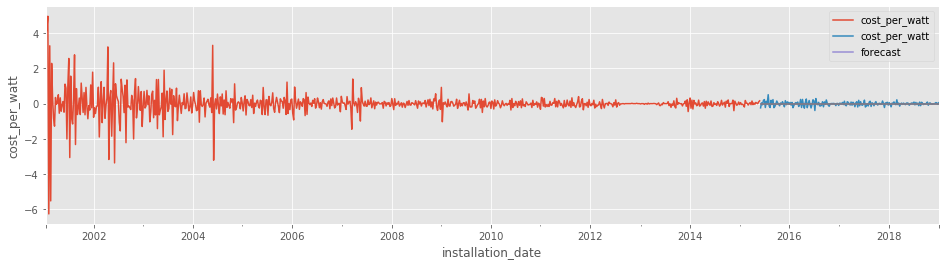

In [42]:
holt_linear_model(diff)

In [45]:
idx = round(len(diff) * .8)
train = diff[:idx]
test = diff[idx:]
fit1 = Holt(np.asarray(train['cost_per_watt'])).fit()
test['forecast'] = fit1.forecast(len(test))

In [46]:
test

,cost_per_watt,forecast
installation_date,,
2015-06-07,-0.240,9.762908e-07
2015-06-14,0.045,9.762908e-07
2015-06-21,-0.065,9.762908e-07
2015-06-28,0.180,9.762907e-07
2015-07-05,0.230,9.762907e-07
...,...,...
2018-12-09,0.010,9.762886e-07
2018-12-16,0.060,9.762886e-07
2018-12-23,0.040,9.762886e-07


In [56]:
diff = diff[50:]

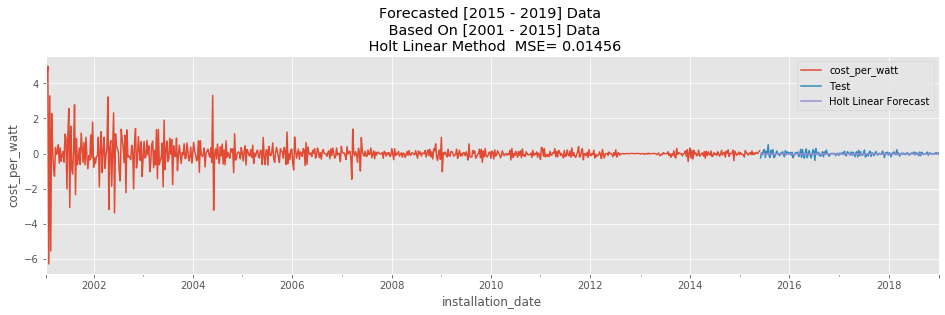

In [47]:
mse = mean_squared_error(test['cost_per_watt'],test['forecast'])
model_plot(test['cost_per_watt'], train, test['forecast'], 'Holt Linear')

In [66]:
idx = round(len(diff) * .8)
train = diff[:idx]
test = diff[idx:]
fit1 = Holt(np.asarray(train['cost_per_watt'])).fit()
test['forecasts'] = fit1.forecast(len(test))

In [69]:
idx = round(len(diff) * .8)
train = diff[:idx]
test = diff[idx:]
fit1 = Holt(np.asarray(train['cost_per_watt'])).fit()
test['forecast'] = fit1.forecast(len(test))

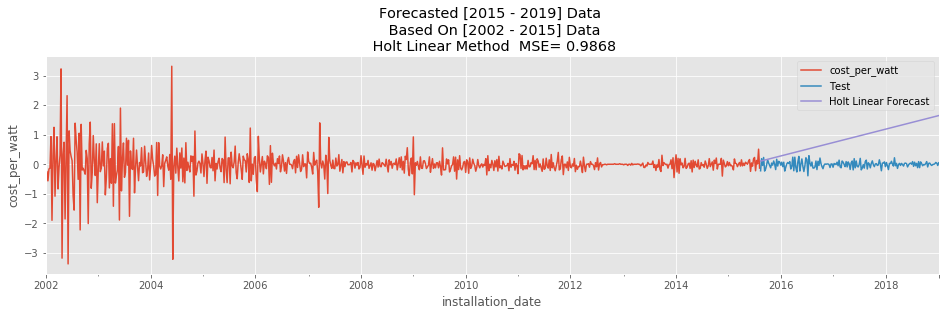

In [70]:
model_plot(test['cost_per_watt'], train, test['forecast'], 'Holt Linear')

In [ ]:
idx = round(len(y) * .8)
train = y[:idx]
test = [idx:]
 

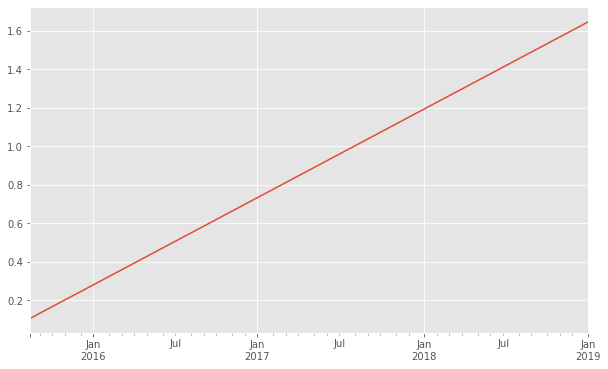

In [74]:
Holt(train['cost_per_watt']).fit().forecast(len(test)).plot()

In [63]:
len(forecast1)

178

In [68]:
mean_squared_error(test['cost_per_watt'], test['forecasts'])

0.9867957823383154

In [ ]:
fit1.forecast(len(test))

In [77]:
df

,system_size,total_installed_price,customer_segment,date,adj_installed_price,cost_per_watt
installation_date,,,,,,
1998-01-30,4.251500,17439.0,RES,1998-01-30,27838.84,6.55
1998-04-08,2.331600,30941.0,RES,1998-04-08,49119.27,21.07
1998-04-30,4.181100,17439.0,RES,1998-04-30,27684.65,6.62
1998-07-07,2.282400,24500.0,RES,1998-07-07,38727.26,16.97
1998-07-10,3.113265,17439.0,RES,1998-07-10,27565.91,8.85
...,...,...,...,...,...,...
2018-12-31,5.760000,22000.0,RES,2018-12-31,22590.03,3.92
2018-12-31,4.410000,21610.0,RES,2018-12-31,22189.57,5.03
2018-12-31,8.640000,45958.6,RES,2018-12-31,47191.20,5.46


In [80]:
y

,cost_per_watt
installation_date,
2001-01-07,5.100
2001-01-21,9.105
2001-01-28,13.380
2001-02-04,18.350
2001-02-11,12.080
...,...
2018-12-09,3.790
2018-12-16,3.850
2018-12-23,3.890


In [79]:
diff

,cost_per_watt
installation_date,
2002-01-06,-0.775
2002-01-13,-0.240
2002-01-20,-0.560
2002-01-27,-0.160
2002-02-03,-0.130
...,...
2018-12-09,0.010
2018-12-16,0.060
2018-12-23,0.040


ValueError: y_true and y_pred have different number of output (2!=1)

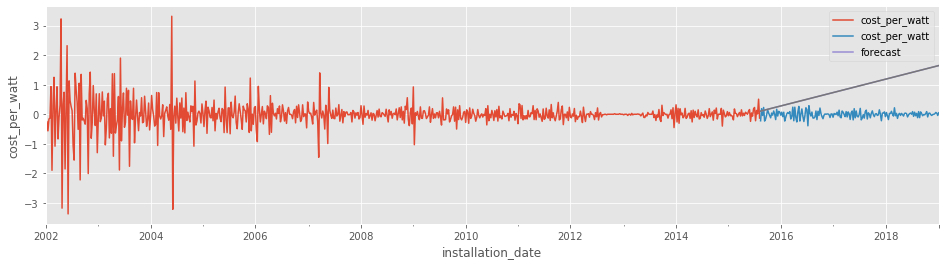

In [71]:
holt_linear_model(diff)

In [81]:
from sklearn.model_selection import TimeSeriesSplit

In [89]:
train,test = TimeSeriesSplit(diff)

ValueError: The number of folds must be of Integral type.                    cost_per_watt
installation_date               
2002-01-06                -0.775
2002-01-13                -0.240
2002-01-20                -0.560
2002-01-27                -0.160
2002-02-03                -0.130
...                          ...
2018-12-09                 0.010
2018-12-16                 0.060
2018-12-23                 0.040
2018-12-30                -0.040
2019-01-06                 0.050

[888 rows x 1 columns] of type <class 'pandas.core.frame.DataFrame'> was passed.

In [87]:
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X=diff):
    train, test = diff[train_index], diff[test_index]
    print(train,test)


KeyError: "None of [Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,\n            ...\n            138, 139, 140, 141, 142, 143, 144, 145, 146, 147],\n           dtype='int64', length=148)] are in the [columns]"

In [ ]:
mse = mean_squared_error(test['cost_per_watt'],test['forecast'])

In [90]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
tree_model = DecisionTreeRegressor().fit()

TypeError: fit() missing 1 required positional argument: 'y'